# Ensembles and the Binomial distribution

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

---

This notebook looks at ensembles of independent binary classifiers using the Binomial distribution.

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import seaborn as sns
from scipy.stats import binom

sns.set_style('white')

# Ensemble of weak base classifiers with $p=0.4$

Suppose we have 50 independent binary classifiers, each of which is only 60% accurate (error rate 0.4). The output of each binary classifier can be modeled as a Bernoulli with $p=0.4$ of error. The sum of independent Bernolli random variables is a Binomial random variable, and so the probability of having $k$ errors with $N$ classifiers is given by:
$$
    P(k) = {n \choose k} p^k q^{n-k}
$$
Let's plot this probability mass function for 50 classifiers with $p=0.4$.

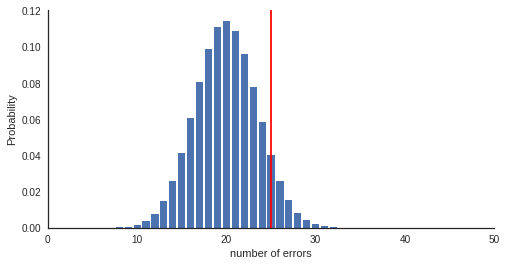

In [ ]:
n_classifiers = 50
error_rate = 0.4
x = np.arange(n_classifiers)
px = binom.pmf(x, n_classifiers, error_rate)


figure(figsize=(8,4))
bar(x, px)
xlim(0, n_classifiers)
xlabel('number of errors')
ylabel('Probability')
axvline(n_classifiers/2.0, color='red')
sns.despine()

The red line in the above shows the majority vote threshold (25 classfiers). Summing over the bars on the right of this gives the probability that the ensemble voting classifier will misclassify.

What's the probability that at least half the classifiers produce the wrong decision?

In [ ]:
p_fail = 1 - px[:len(px)//2].sum()
print(round(p_fail*100, 2), '%', sep='')

9.78%


So the accuracy of an ensemble of 50 weak classifiers, each that is only 60% accurate, is over 90%

## Ensemble of base classifiers with $p=0.3$

Let's make our base classifiers 10 percentage points more accurate ($p=0.3$) and see how this affects the distribution and ensemble error rate

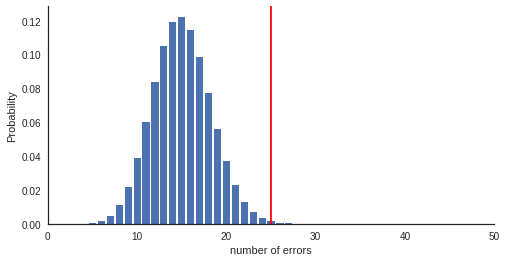

In [ ]:
n_classifiers = 50
error_rate = 0.3
x = np.arange(n_classifiers)
px = binom.pmf(x, n_classifiers, error_rate)


figure(figsize=(8,4))
bar(x, px)
xlim(0, n_classifiers)
xlabel('number of errors')
ylabel('Probability')
axvline(n_classifiers/2.0, color='red')
sns.despine()

In [ ]:
# what's the probability that at least half the classifiers produce the wrong decision?
p_fail = 1 - px[:len(px)//2].sum()
print(round(p_fail*100, 2), '%', sep='')

0.24%


Less than 0.25% error or 99.75% accuracy! That's a large improvement.

## Independence

Remember, however, that the above assumes *independent* Bernoulli trials. However, in practice, the outputs of our classifiers are almost never completely independent, and so the practical improvement is less. Nevertheless, ensembling high variance classifiers often improves performance in practice. E.g. it is common practice in machine learning competitions to train various different classifiers and average the results to improve performance. When working with deep neural networks, you can train $N$ networks with different random initializations to obtain $N$ different classification functions and then average the results.